In [12]:
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import LabelBinarizer, StandardScaler, maxabs_scale
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from parallel_pandas import ParallelPandas
from scipy import stats
from scipy.stats import gamma
#Probably want to add a year scaling function to the number of bins (This was not done and probably will never be done)
def graph_patents(df, patentnumber):
    cdmapatent = df.loc[df['Pub'] == patentnumber]
    graphlist = cdmapatent['Cited_Date'].apply(sanitize).to_list()
    #print(graphlist)
    n,bins,patches = plt.hist(graphlist,bins = 15, width = 0.75)
    plt.title("Patent Citations for US Patent " +  patentnumber)
    plt.xlabel("Year")
    plt.ylabel("Number of Citations")
    plt.xlim([min(graphlist)+1,max(graphlist)+1])
    #plt.savefig(patentnumber +".png")
    plt.show()
def graph_gamma(df, patentnumber):
    cdmapatent = df.loc[df['Pub'] == patentnumber]
    graphlist = cdmapatent['Cited_Date'].apply(sanitize).to_list()
    #print(graphlist)
    graphlist = sorted(graphlist)
    a = 1
    pdf_gamma = stats.gamma.pdf(graphlist, a, loc = 1990, scale = 0.5)
    plt.plot(graphlist, pdf_gamma)
    plt.title("Gamma Distribution of patent Citations for US Patent " + patentnumber)
    plt.xlabel("Year")
    plt.ylabel("Density")
    plt.show()
#Cutoff refers to the the amount of time it took for a given patent to receive X citations
def sanitize(date):
    date = int(str(date)[:4])
    return date
def find_time(df, patentnumber, cutoff):
    patent = df.loc[df['Pub'] == patentnumber]
    datelist = patent['Cited_Date'].to_list()
    datelist = sorted(datelist)
    datelist = datelist[:cutoff]
    newint = sanitize(datelist[cutoff-1])-sanitize(datelist[0])
    return newint
def find_time_percentile(df, patentnumber, percentile):
    
    patent = df.loc[df['Pub'] == patentnumber]
    datelist = patent['Cited_Date'].to_list()
    datelist = sorted(datelist)
    range = round(len(datelist) * percentile * 0.01)
    newint = sanitize(datelist[range])-sanitize(datelist[0])
    return newint
def quantileranges(percentile, year1, year2):
    df = pd.read_csv("/home/jayden/Code/PatentAnalysis/patent_results"+year1+"-"+year2+".csv")
    counts = df['Pub'].value_counts().to_frame()
    print(counts[:10])
    #counts  = counts.where(counts.gt(counts.quantile(percentile))).stack().sort_index()
    #counts.to_csv("patent_results" + year1+"-"+year2+ str(percentile)+"percentile.csv")

def find_last(df, patentnumber,lastnumber):
    patent = df.loc[df['Pub'] == patentnumber]
    datelist = patent['Cited_Date'].to_list()
    datelist = sorted(datelist)
    datelist = datelist[-lastnumber:]
    return 2023-sanitize(datelist[0])
   

In [127]:
ParallelPandas.initialize(n_cpu = 8, split_factor =4, disable_pr_bar = False)
#Set the bucket of data here
df = pd.read_csv("/home/jayden/Code/PatentAnalysis/patent_results_test.csv")
print(df)



                  Pub           Citedby  Cited_Date
0        US-5327211-A  US-2010130757-A1    20100121
1        US-5253932-A  US-2009053473-A1    20081027
2        US-5235981-A  US-2009198131-A1    20090330
3        US-5186530-A  US-2009231834-A1    20090417
4        US-5142578-A  US-2010095124-A1    20091215
...               ...               ...         ...
7720750  US-5209572-A    US-10126514-B2    20170124
7720751  US-5231688-A    US-10126514-B2    20170124
7720752  US-5230492-A    US-10126514-B2    20170124
7720753  US-5231687-A    US-10126514-B2    20170124
7720754  US-5233674-A    US-10126514-B2    20170124

[7720755 rows x 3 columns]


In [10]:
total = pd.read_csv("clustering_master.csv")
codes = total['Pub'].to_list()
for i in range(1990,2000,2):
    df = pd.read_csv("/home/jayden/Code/PatentAnalysis/patent_results" + str(i) + "-" + str(i+2) + ".csv")
    df = df[df['Pub'].isin(codes)]
    print(df)
    df.to_csv(str(i)+".csv")

                  Pub           Citedby  Cited_Date
42       US-5223409-A  US-2008248545-A1    20080201
98       US-5197649-A  US-2008283576-A1    20070928
107      US-5297032-A  US-2009150202-A1    20090216
108      US-5297031-A  US-2009150202-A1    20090216
493      US-5282829-A    US-11679027-B2    20200304
...               ...               ...         ...
7720641  US-5222963-A    US-10178994-B2    20140314
7720642  US-5253793-A    US-10178994-B2    20140314
7720647  US-5145684-A    US-10563224-B2    20170215
7720682  US-5272236-A    US-10577664-B2    20170918
7720685  US-5064435-A    US-10219926-B2    20140603

[151534 rows x 3 columns]
                  Pub         Citedby  Cited_Date
29       US-5391199-A  US-10555672-B2    20170816
34       US-5391199-A  US-10265123-B2    20170127
62       US-5307263-A  US-10278580-B2    20140609
70       US-5205459-A  US-10130361-B2    20160923
73       US-5334183-A  US-10130361-B2    20160923
...               ...             ...         ...

In [11]:
total.to_csv("top_patents_list.csv")

In [24]:
temp = pd.read_csv("top_patents_list_cpc.csv")
total = pd.read_csv("top_patents_list.csv")
total = total.drop_duplicates(subset = ['Pub'])
print(total)
total = total.merge(temp, on = "Pub")
total = total.drop(columns = "Unnamed: 0")
total = total.drop_duplicates(subset = ['Pub'])
print(total)

                Pub             cpc
0      US-5794207-A   Y10S707/99933
1      US-5143854-A  B01J2219/00626
2      US-5445934-A    B01J2219/005
4     US-6698020-B1    H04N21/44224
5      US-5862325-A   Y10S707/99945
...             ...             ...
662    US-5608872-A      H04L69/329
742    US-5731856-A     G02F1/13458
811    US-5572643-A      G06F16/957
1173   US-5724521-A       G06Q30/02
1388   US-5084057-A     A61B17/1285

[98 rows x 2 columns]
    Unnamed: 0            Pub  Counts
0            0   US-5223409-A    3974
1            1   US-5530101-A    3630
2            2   US-5143854-A    3037
3            3   US-5225539-A    3006
4            4   US-5247190-A    2928
..         ...            ...     ...
95          15  US-6606744-B1    2312
96          16  US-6325810-B1    2309
97          17  US-6535909-B1    2291
98          18  US-6233617-B1    2251
99          19  US-6264087-B1    2251

[100 rows x 3 columns]
              Pub  Counts              cpc
0    US-5223409-A    3

In [129]:
#df = df.drop_duplicates(subset = ['Pub','Citedby'])
counts = df['Pub'].value_counts()
#value_counts returns a series in key-value form which is undesirable
#The code below should convert it into a usable form
templist = counts.axes[0]
templist1 = counts.values
total = pd.DataFrame()
total['Pub'] = templist
total['Counts'] = templist1
total = total[total['Counts'] >= 1500]
#print(total[:20])


              Pub  Counts
0    US-5223409-A    3974
1    US-5530101-A    3630
2    US-5143854-A    3037
3    US-5225539-A    3006
4    US-5247190-A    2928
5    US-5084057-A    2673
6    US-5042707-A    2568
7    US-5569825-A    2535
8    US-5103459-A    2497
9   US-5103459-B1    2497
10   US-5129570-A    2492
11   US-5065929-A    2320
12   US-5104025-A    2260
13   US-5289963-A    2126
14   US-RE34519-E    2107
15   US-5171247-A    2014
16   US-5192327-A    1923
17   US-5190517-A    1920
18   US-5234447-A    1918
19   US-5253793-A    1914


In [300]:
breakthroughs = total['Pub'].to_list()

In [307]:
#It might be useful to store this data in a file
#The code here can be customized to find how long it took to reach the Xth percentile of citations
timetobreakthrough = pd.DataFrame(columns = ['Pub','Time'])
for i in breakthroughs:
    temp = []
    temp.append(i)
    temp.append(find_last(df,i,100))
    #temp.append(find_time_percentile(df, i , 90))
    #temp.append(find_time(df, i,1000))
    timetobreakthrough.loc[len(timetobreakthrough)] = temp
print(timetobreakthrough)


                  Pub  Time
0       US-6323846-B1     2
1       US-6177931-B1     4
2       US-6727522-B1     3
3       US-6294274-B1     3
4    US-2001046027-A1     3
..                ...   ...
151     US-6450989-B2     3
152      US-6108703-A     5
153      US-6006264-A     5
154      US-6121009-A     3
155     US-7118582-B1     3

[156 rows x 2 columns]


In [308]:
#Differentiation here need to be made for counting until X citations and counting until the Xth percentile of citations
timetobreakthrough.to_csv("1998-2000/time_3_1998-2000.csv")
#timetobreakthrough.to_csv("time1998-2000.csv")

In [67]:
for i in breakthroughs:
    graph_patents(df, i)

In [160]:
#Trying out some clustering here, this is all set up
def cpc_times_cleanup(startyear, tag):
    cpc_codes = pd.read_csv(str(startyear) + "-" + str(startyear+2) + "/patent_cpc_code" + str(startyear) + "-" + str(startyear+2) + ".csv")
    cpc_codes = cpc_codes.drop_duplicates(subset = ["Pub"])
    #Label Binarization
    labels = cpc_codes['cpc'].to_list()
    lb = LabelBinarizer()
    lb.fit(labels)
    newarr = lb.transform(labels)
    print(len(newarr[0]))
    binarized = []
    count = 0
    for i in newarr:
        #temp = []
        #temp.append(i)

        binarized.append(i.tolist().index(1))
        #count +=1
    print(binarized[0])
    cpc_codes['cpc'] = binarized
    patent_times = pd.read_csv(str(startyear) + "-" + str(startyear+2) + "/time" + tag + str(startyear) + "-" + str(startyear+2) + ".csv")
    patent_times = patent_times.drop("Unnamed: 0", axis = 1)
    unified = patent_times.merge(cpc_codes, on = "Pub")
    unified = unified.drop_duplicates(subset = ["Pub"])
    return unified, lb

In [5]:
def remove_cpc(input):
    input = input.drop(columns = ['cpc', 'Time'],axis = 1)
    return input

In [27]:
def get_filename(startyear, tag):
    temp = str(startyear)+"-"+str(startyear+2)+"/"+"time"+tag+str(startyear) + "-" + str(startyear+2)+".csv"
    return temp

In [6]:
def setup_cluster(year):
    times = pd.read_csv(get_filename(year, ""))
    times_10 = pd.read_csv(get_filename(year, "_1_"))
    times_90 = pd.read_csv(get_filename(year, "_2_"))
    times_100 = pd.read_csv(get_filename(year, "_3_"))
    times = times.drop("Unnamed: 0",axis = 1)
    times_10 = times_10.rename(columns = {"Time":"Time_10"})
    times_90 = times_90.rename(columns = {"Time": "Time_90"})
    times_100 = times_100.rename(columns = {"Time": "Time_100"})
    times_10 = times_10.drop("Unnamed: 0", axis = 1)
    times_90 = times_90.drop("Unnamed: 0", axis = 1)
    times_100 = times_100.drop("Unnamed: 0", axis = 1)
    unified = times.merge(times_10, on = "Pub")
    print(unified)
    unified = unified.merge(times_90, on = "Pub")
    unified = unified.merge(times_100, on = "Pub")
    print(unified)
    unified.to_csv(str(year)+"-"+str(year+2)+"/clustering"+str(year) + "-" + str(year+2)+".csv")
    return unified

In [2]:
#Actual clustering starts here 
#There is 100% a better way to do this
"""
def setup_cluster(year):
    times_10, labels = cpc_times_cleanup(year, '_1_')
    times_10['Times_10'] = times_10['Time']
    times_10 = remove_cpc(times_10)
    print(times_10)
    times, labels = cpc_times_cleanup(year, '')
    times_90, labels = cpc_times_cleanup(year, '_2_')
    times_90['Times_90'] = times_90['Time']
    times_90 = remove_cpc(times_90) 
    last_100, labels = cpc_times_cleanup(year, '_3_')
    last_100['Last_100'] = last_100['Time']
    last_100 = remove_cpc(last_100)
    clustering_unified = times.merge(times_10, on = "Pub")
    clustering_unified = clustering_unified.merge(times_90, on = "Pub")  
    clustering_unified = clustering_unified.merge(last_100, on = "Pub")
    clustering_backup = clustering_unified
    clustering_unified = clustering_unified.drop(columns = "Pub")
    clustering_backup.to_csv(str(year) + '-' + str(year+2) + "/clustering" + str(year)+"-"+str(year+2) + ".csv")
    return labels
    """
#kmeans = MeanShift()


'\ndef setup_cluster(year):\n    times_10, labels = cpc_times_cleanup(year, \'_1_\')\n    times_10[\'Times_10\'] = times_10[\'Time\']\n    times_10 = remove_cpc(times_10)\n    print(times_10)\n    times, labels = cpc_times_cleanup(year, \'\')\n    times_90, labels = cpc_times_cleanup(year, \'_2_\')\n    times_90[\'Times_90\'] = times_90[\'Time\']\n    times_90 = remove_cpc(times_90) \n    last_100, labels = cpc_times_cleanup(year, \'_3_\')\n    last_100[\'Last_100\'] = last_100[\'Time\']\n    last_100 = remove_cpc(last_100)\n    clustering_unified = times.merge(times_10, on = "Pub")\n    clustering_unified = clustering_unified.merge(times_90, on = "Pub")  \n    clustering_unified = clustering_unified.merge(last_100, on = "Pub")\n    clustering_backup = clustering_unified\n    clustering_unified = clustering_unified.drop(columns = "Pub")\n    clustering_backup.to_csv(str(year) + \'-\' + str(year+2) + "/clustering" + str(year)+"-"+str(year+2) + ".csv")\n    return labels\n    '

In [7]:
lb = setup_cluster(1990)
print(lb)

             Pub  Time  Time_10
0   US-5223409-A    13       12
1   US-5530101-A    15       12
2   US-5225539-A    18       16
3   US-5569825-A    14       11
4   US-5143854-A    12        8
..           ...   ...      ...
79  US-5354556-A    19        9
80  US-5197648-A    25       18
81  US-5009661-A    26       15
82  US-5335657-A    19       10
83  US-5059595-A    21       11

[84 rows x 3 columns]
             Pub  Time  Time_10  Time_90  Time_100
0   US-5223409-A    13       12       28         1
1   US-5530101-A    15       12       28         2
2   US-5225539-A    18       16       32         1
3   US-5569825-A    14       11       26         2
4   US-5143854-A    12        8       25         4
..           ...   ...      ...      ...       ...
79  US-5354556-A    19        9       24         4
80  US-5197648-A    25       18       28         3
81  US-5009661-A    26       15       28         3
82  US-5335657-A    19       10       23         5
83  US-5059595-A    21       11 

In [167]:
def convert_to_cpc(lb, input, length):
    test = np.zeros(length).reshape(1,length)
    test[0][input] = 1
    return lb.inverse_transform(test)

In [17]:
clustering_unified = pd.read_csv("clustering_master.csv")
clustering_unified = clustering_unified[clustering_unified.Time != "Time"]
clustering_backup = clustering_unified
clustering_unified = clustering_unified.drop(columns = ["Pub", "Unnamed: 0"],axis = 1)
#clustering_unified = StandardScaler().fit_transform(clustering_unified)
#clustering_unified = maxabs_scale(clustering_unified)
clustering_backup = clustering_backup.drop(columns = ["Unnamed: 0"])


In [20]:
#kmeans = MeanShift()
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init = "auto")
label = kmeans.fit_predict(clustering_unified)




clustering_backup['Cluster'] = label
print(clustering_backup)

               Pub Time Time_10 Time_90 Time_100  Cluster
0     US-5223409-A   13      12      28        1        0
1     US-5530101-A   15      12      28        2        2
2     US-5225539-A   18      16      32        1        2
3     US-5569825-A   14      11      26        2        0
4     US-5143854-A   12       8      25        4        0
..             ...  ...     ...     ...      ...      ...
926  US-6450989-B2   17       7      19        3        0
927   US-6108703-A   15       4      20        5        1
928   US-6006264-A   13       3      20        5        1
929   US-6121009-A   15       7      20        3        0
930  US-7118582-B1   13       7      15        3        1

[927 rows x 6 columns]


In [21]:
#This cell is for generating a top patents file
total_list = total['Pub'].to_list()
temp = []
pubs = clustering_backup['Pub'].to_list()
clusters = clustering_backup['Cluster'].to_list()
for i in total_list:
    temp.append(clusters[pubs.index(i)])
total['Cluster'] = temp
print(total)
total.to_csv("top_patents.csv")

ValueError: 'Pub' is not in list

In [ ]:
#Writing a combination function for the biggest files here
def graph_range(startyear, startindex, clusternumber, clustering):
    count = 0
    df = pd.read_csv(str(startyear) +".csv")
    #df = pd.read_csv("/home/jayden/Code/PatentAnalysis/patent_results" + str(startyear) + "-" + str(startyear+2)+".csv")
    temp = pd.read_csv(str(startyear)+"-"+str(startyear+2)+"/"+"clustering"+str(startyear) + "-" + str(startyear+2) + ".csv")
    pub_codes = clustering['Pub'].to_list()[startindex: startindex+len(temp.index)]
    sliced = label[startindex: startindex+len(temp.index)]

    for i in sliced:
        if i == clusternumber:
            graph_patents(df, pub_codes[count])
            #graph_gamma(df, pub_codes[count])
        count +=1
    return startindex+len(temp.index)

0


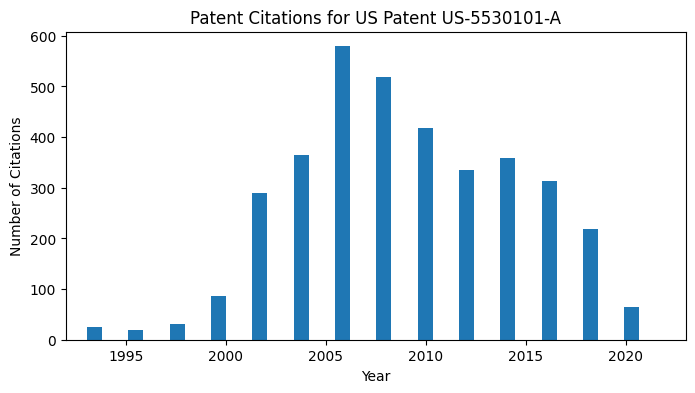

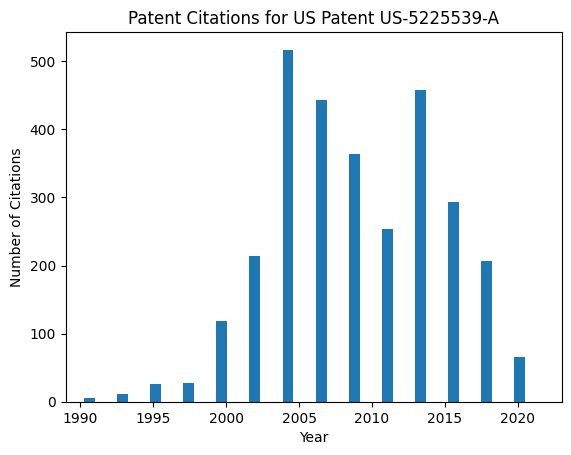

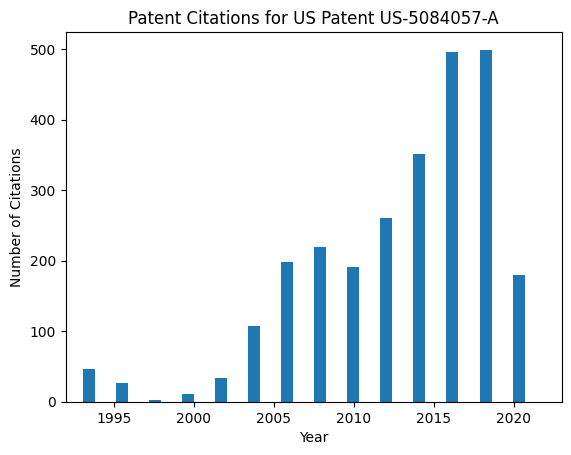

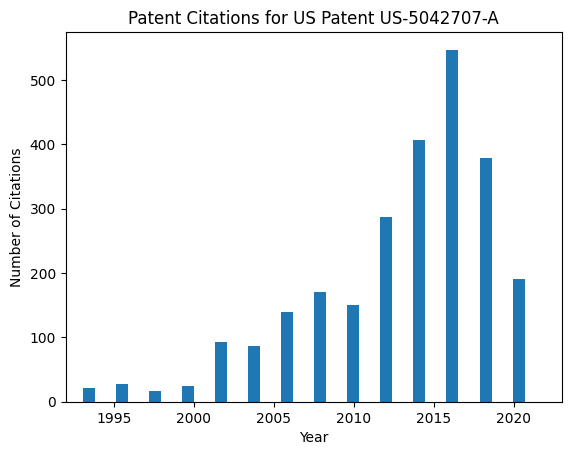

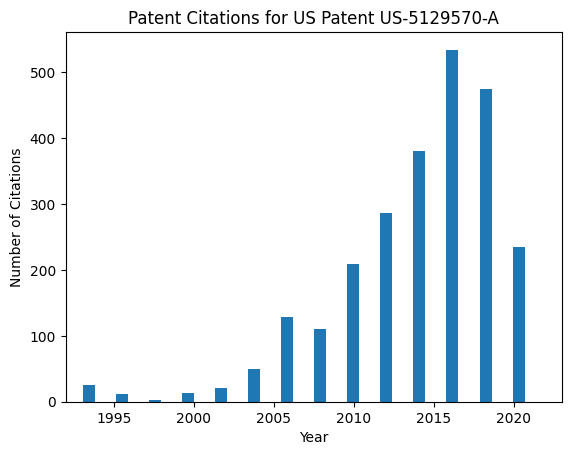

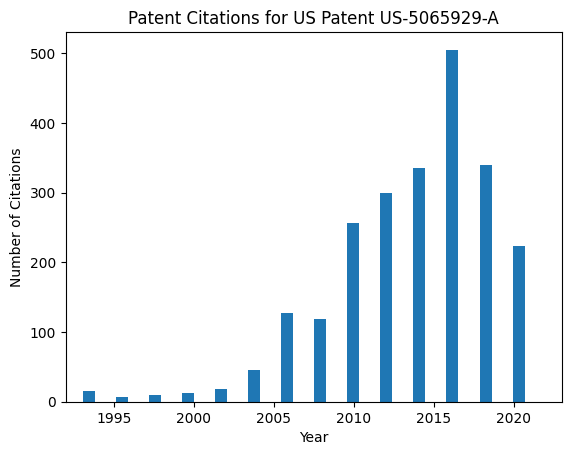

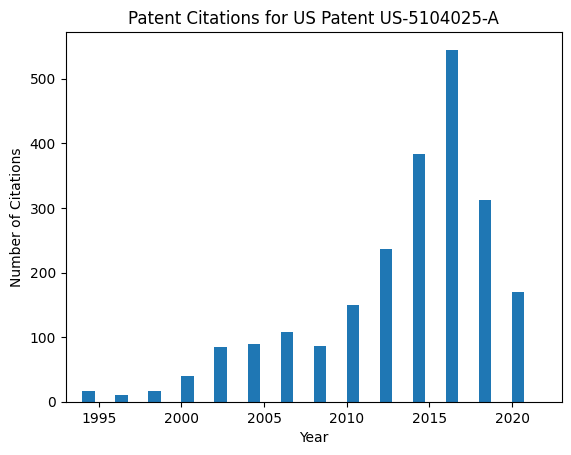

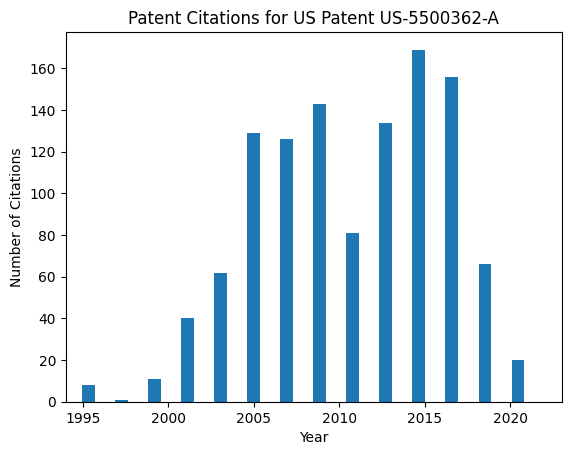

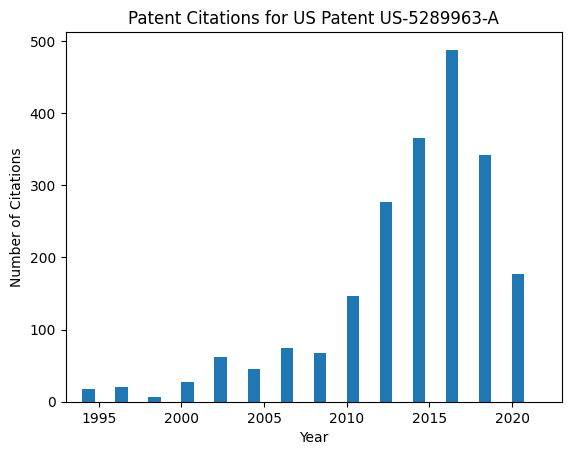

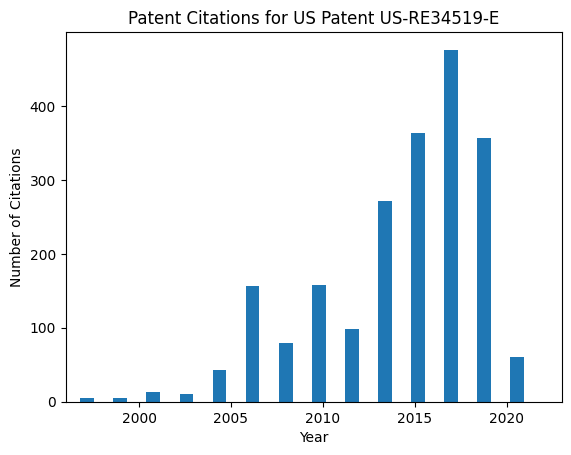

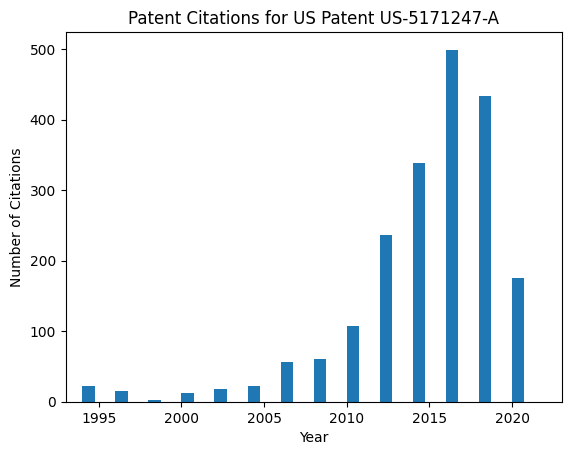

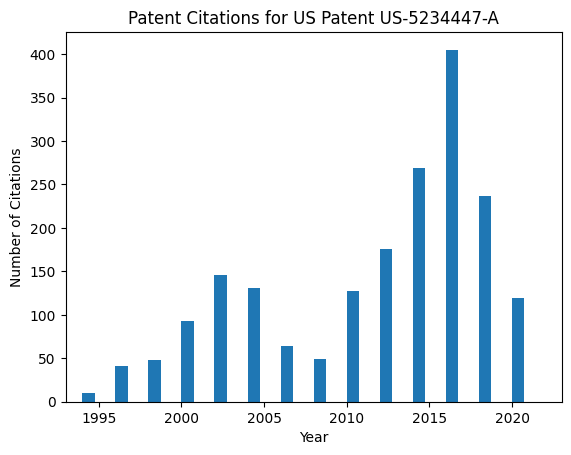

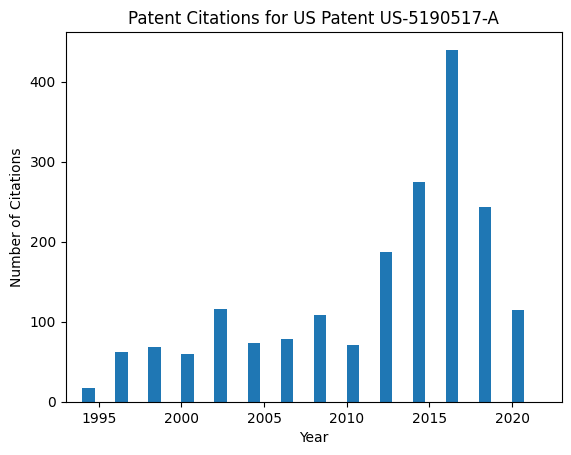

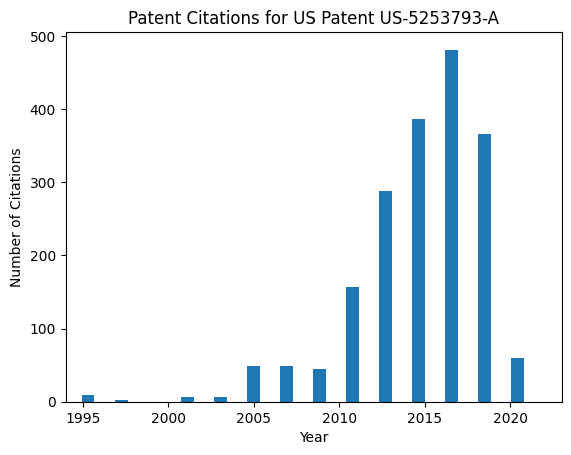

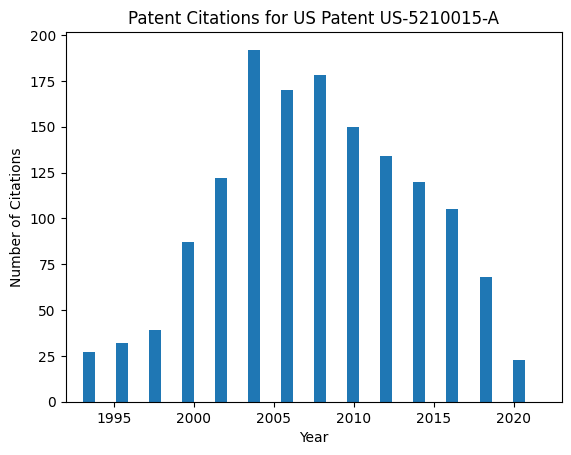

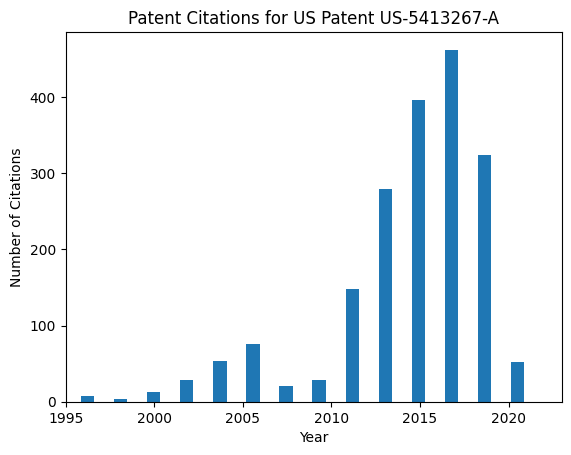

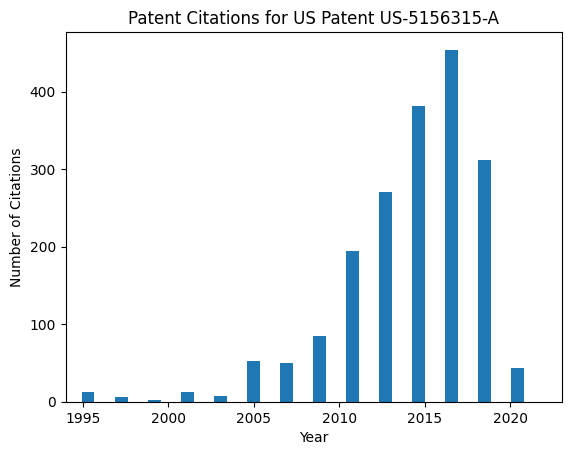

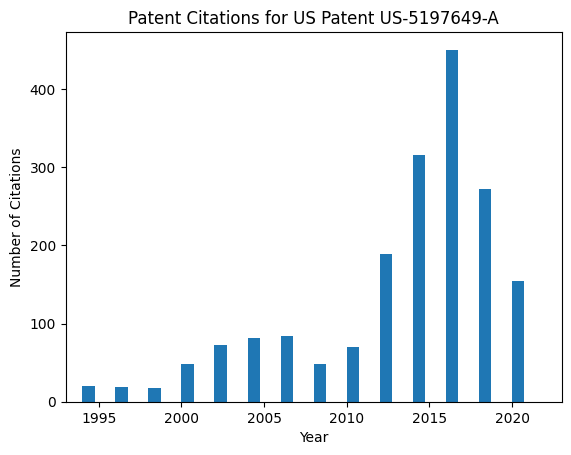

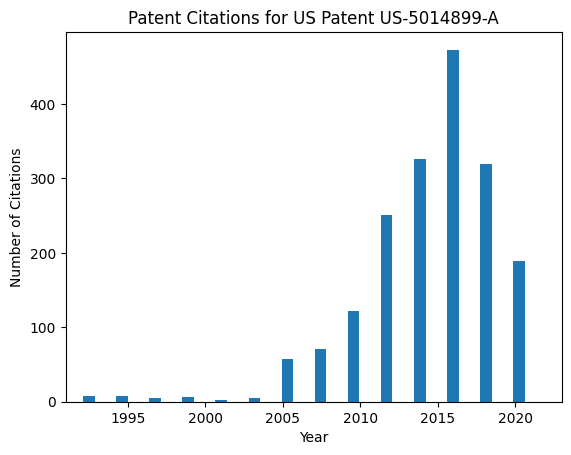

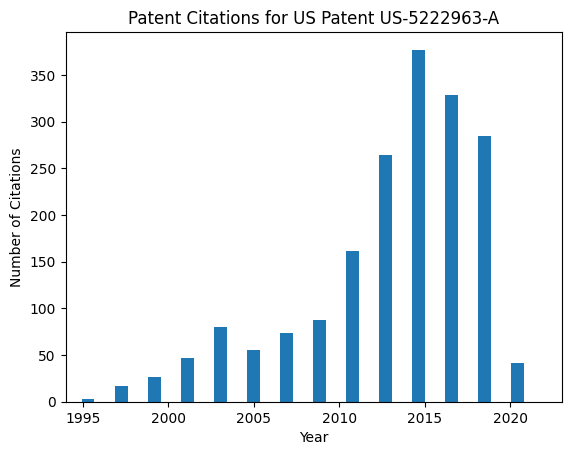

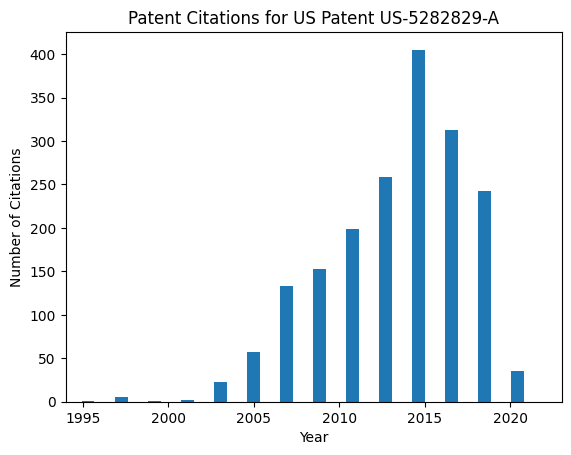

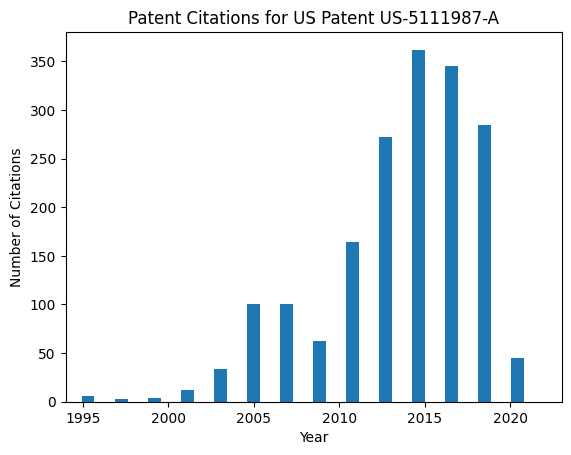

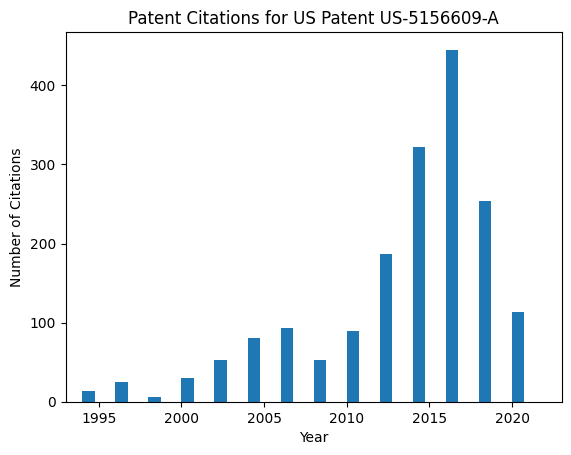

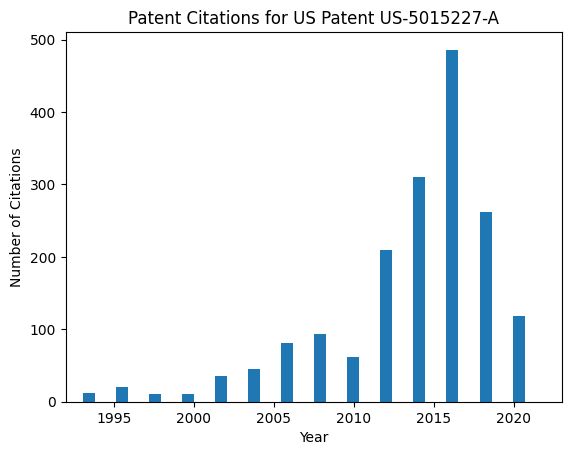

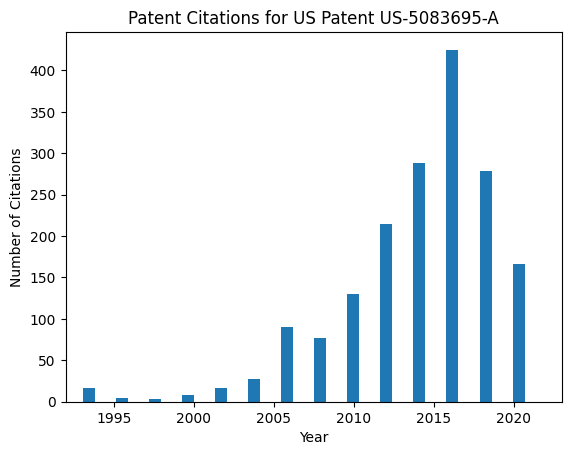

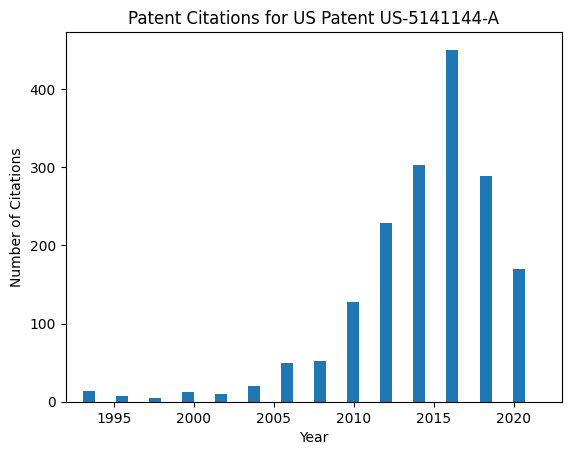

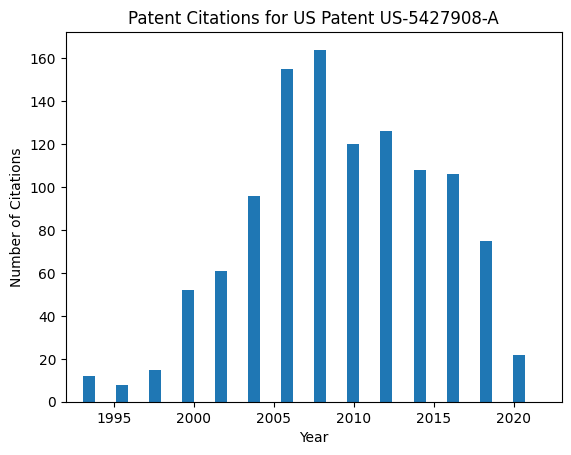

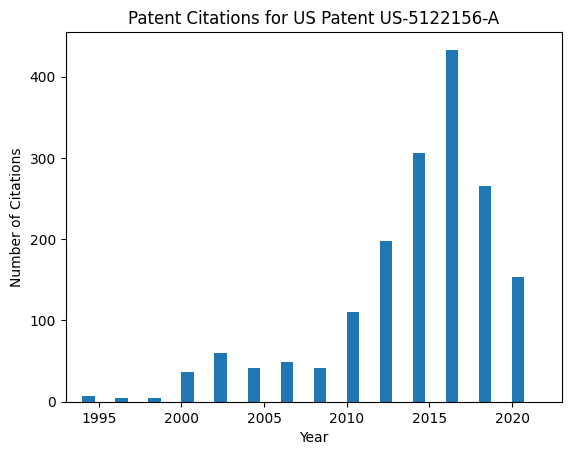

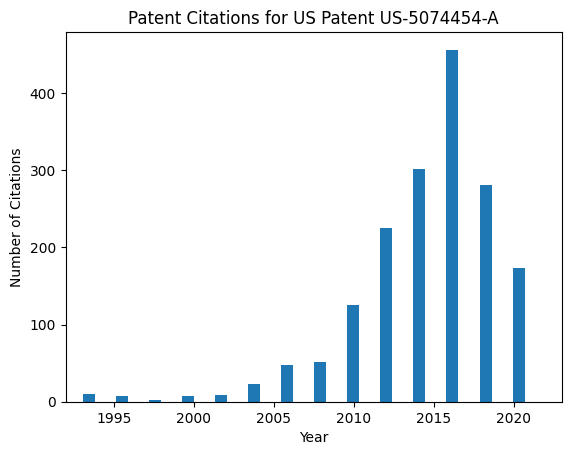

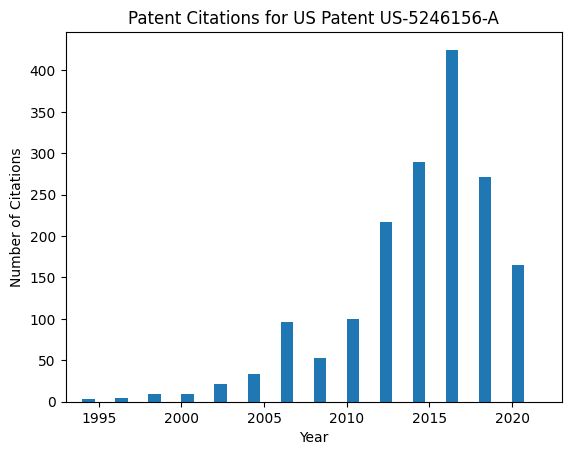

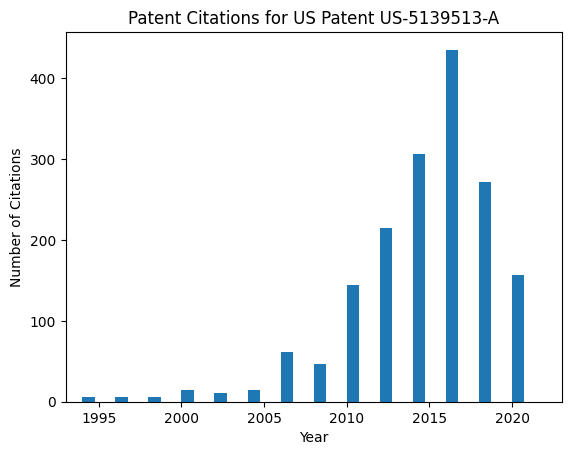

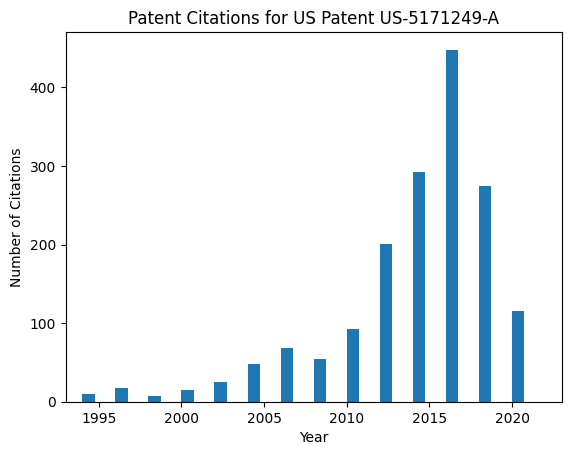

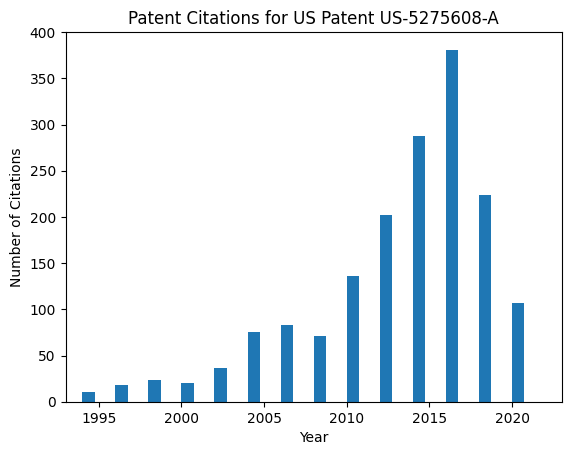

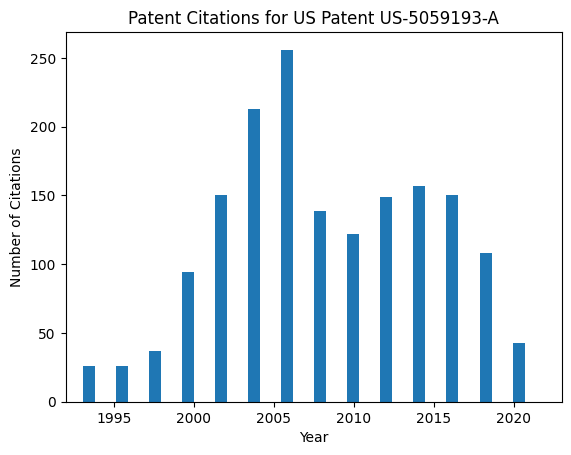

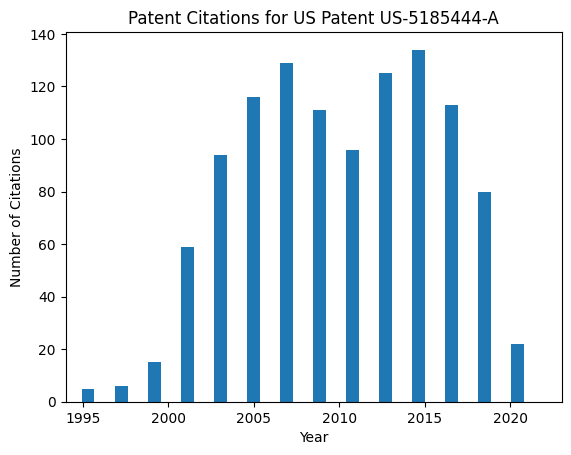

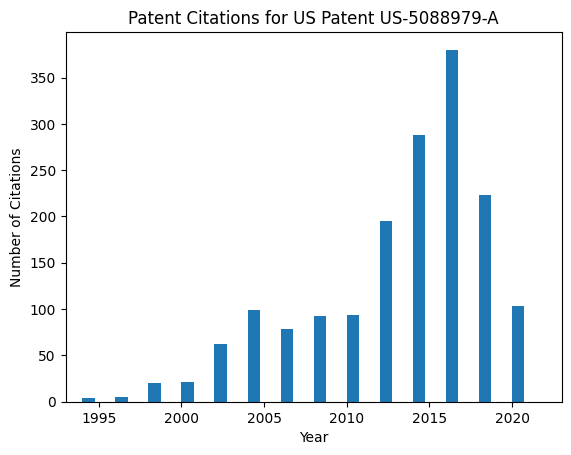

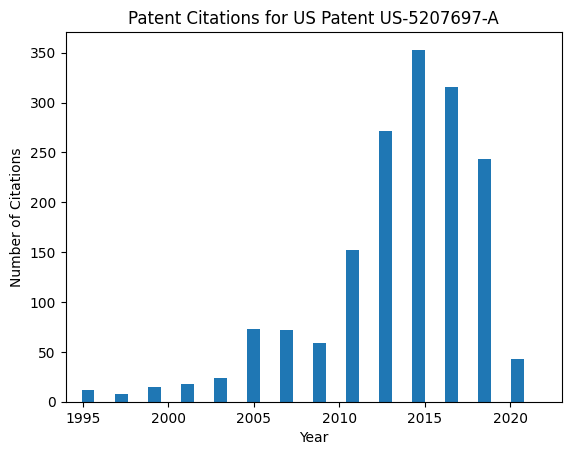

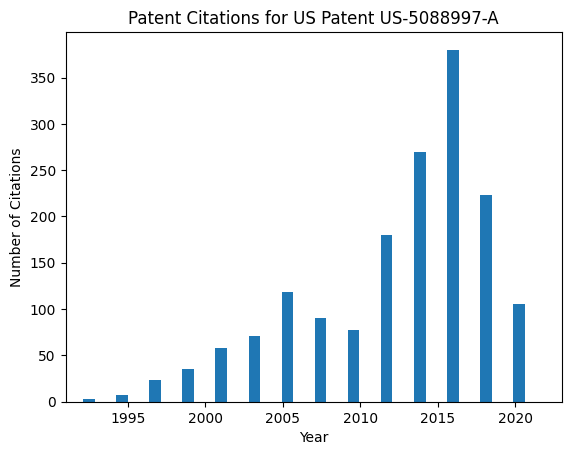

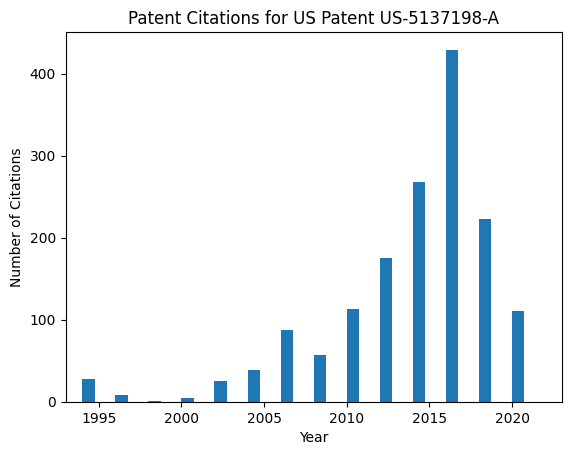

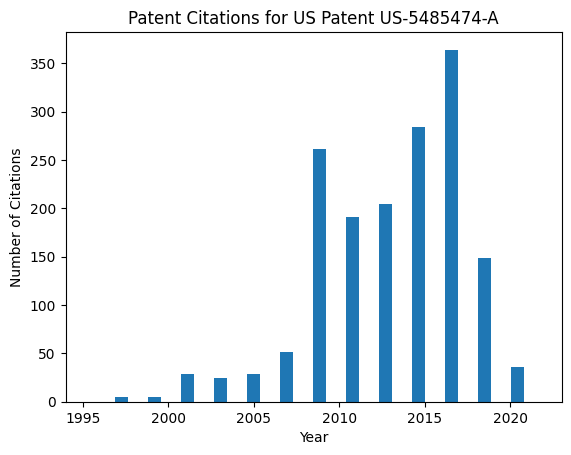

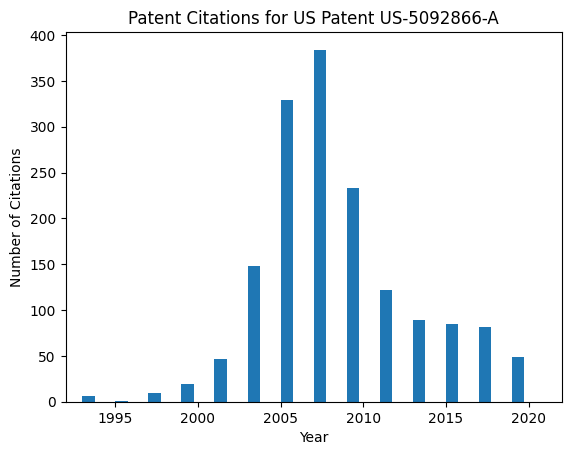

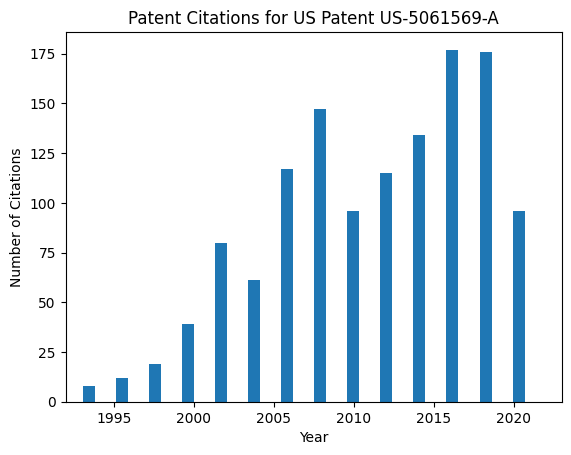

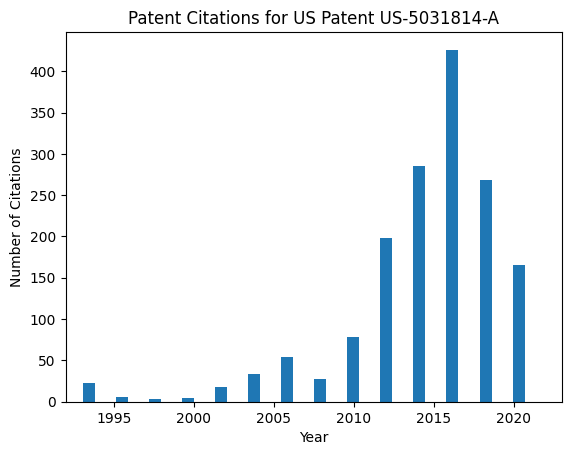

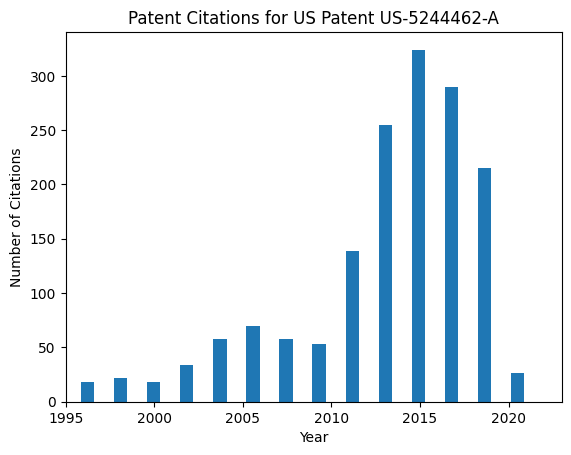

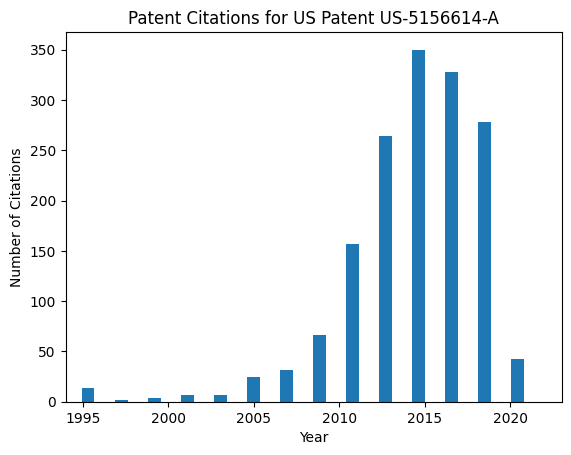

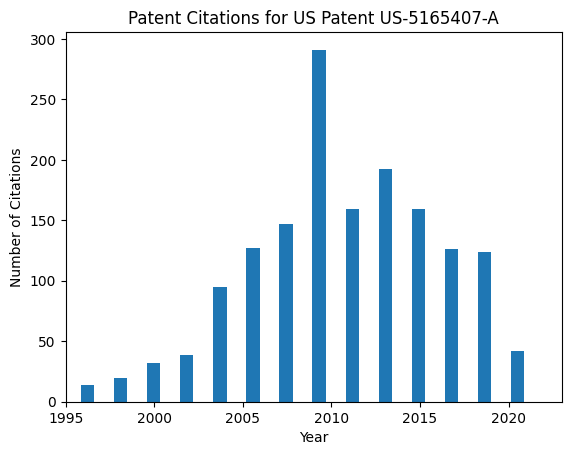

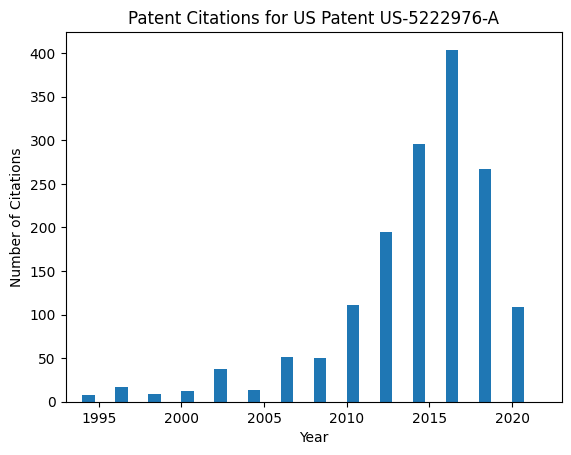

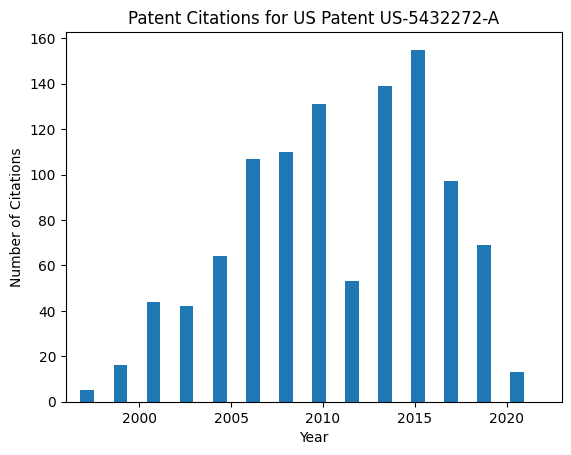

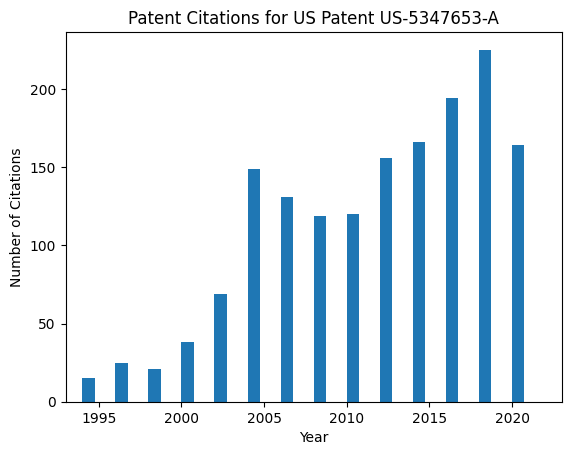

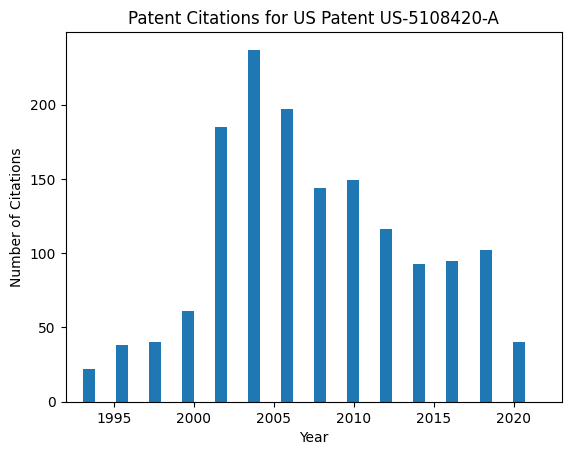

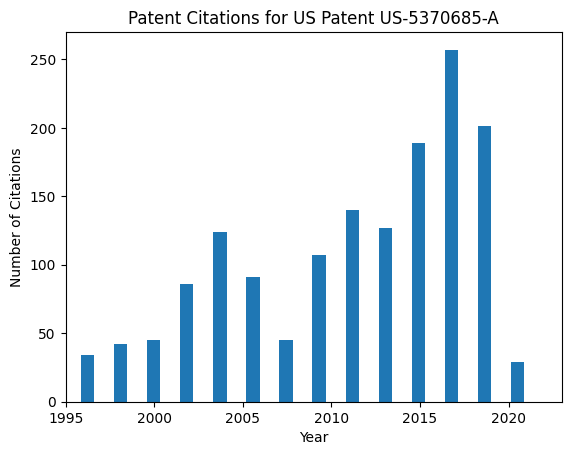

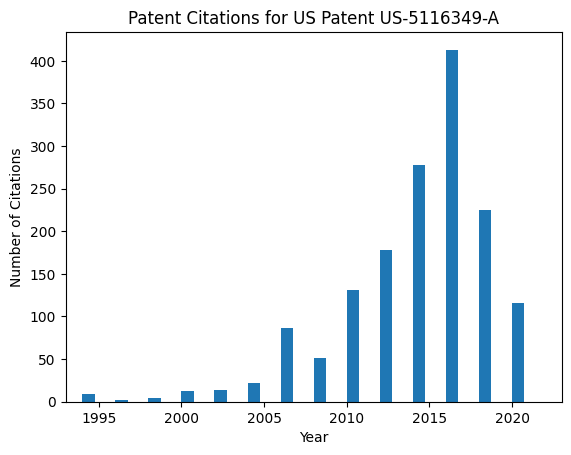

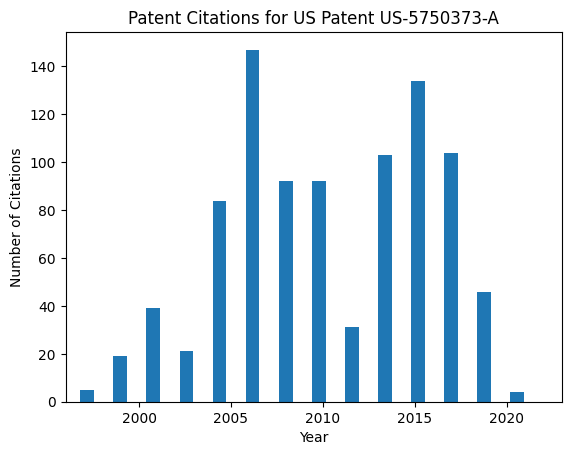

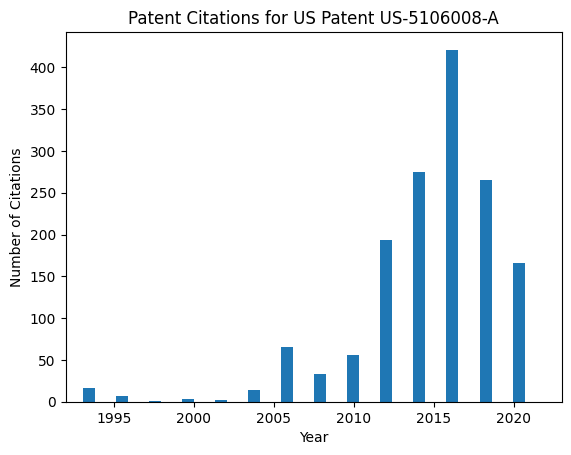

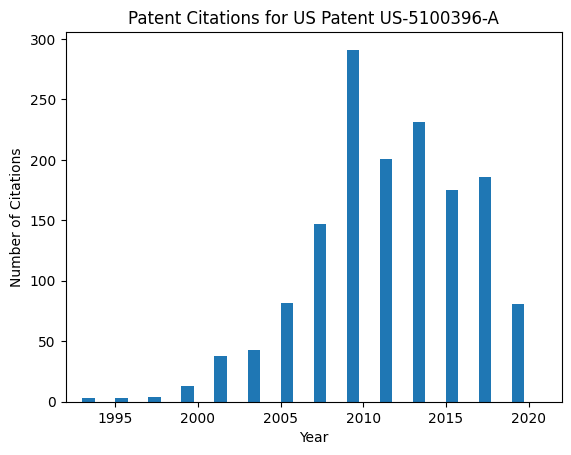

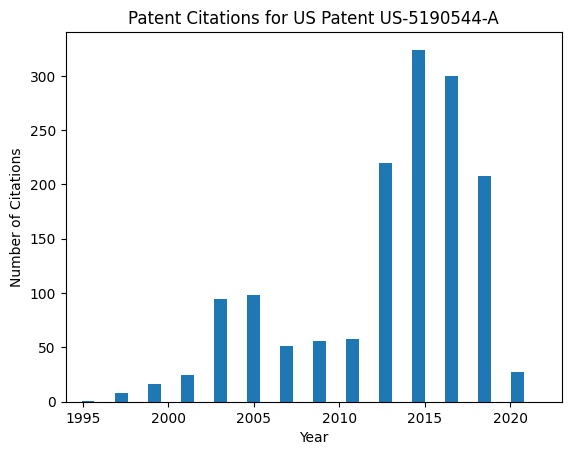

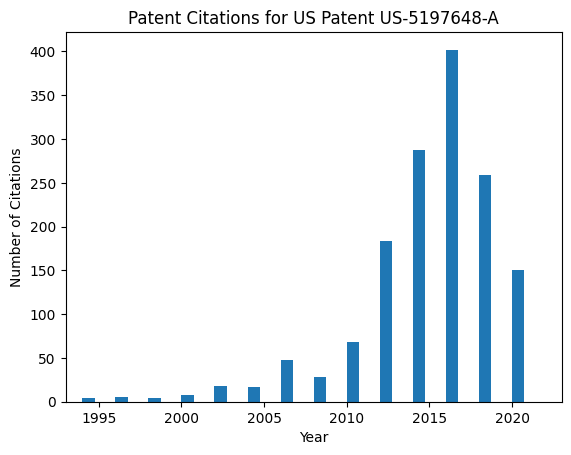

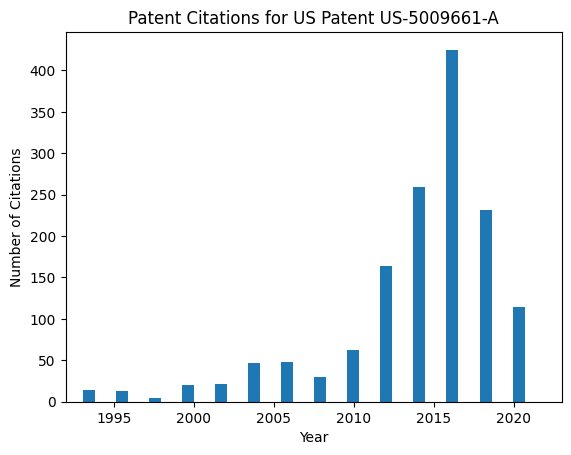

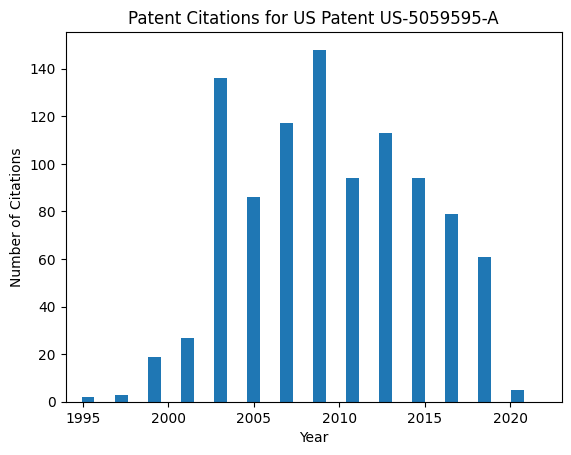

84


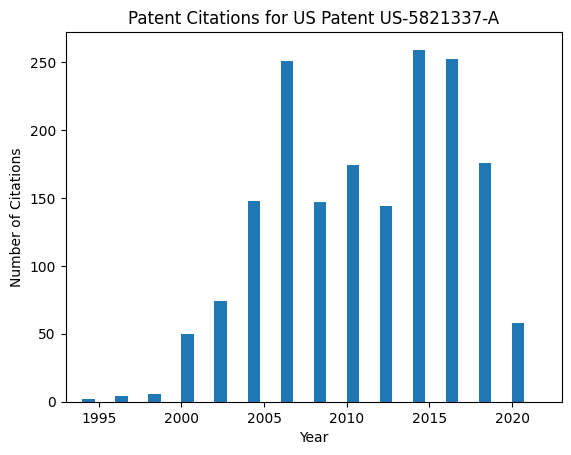

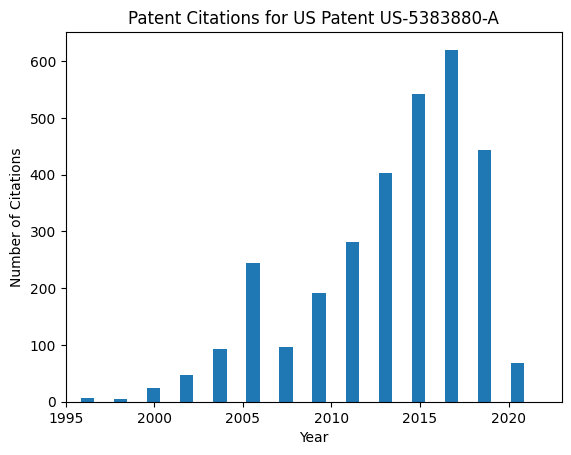

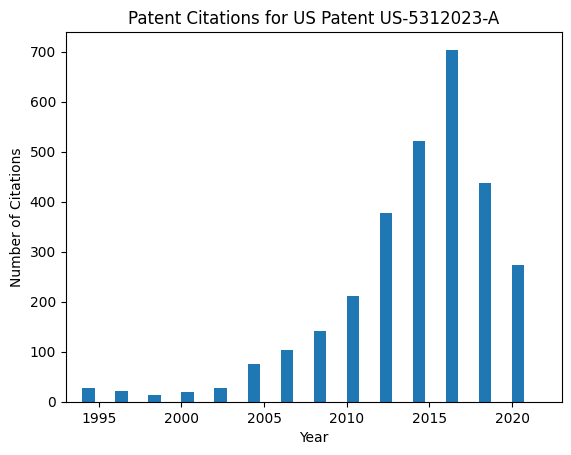

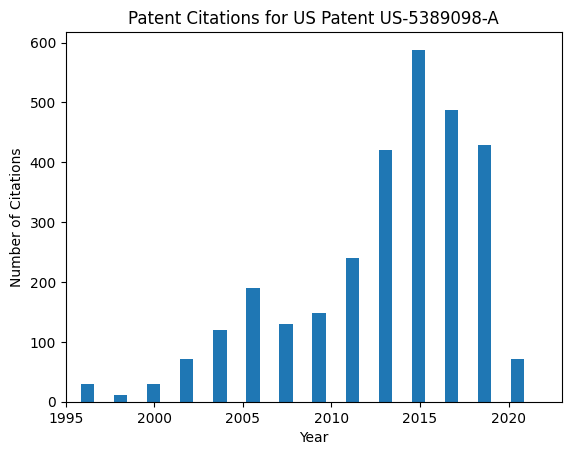

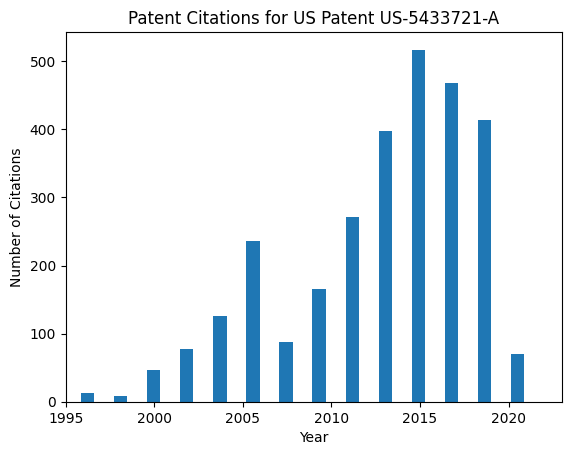

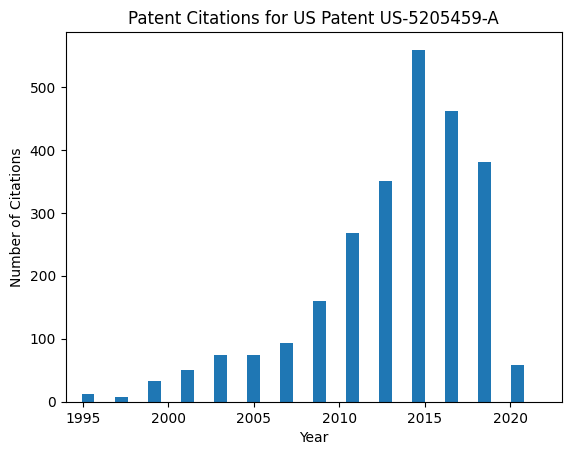

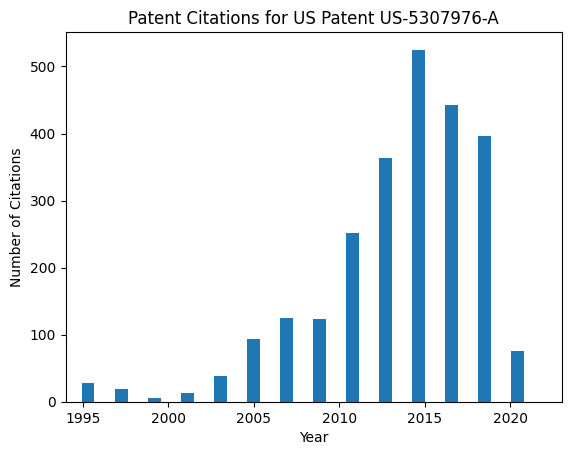

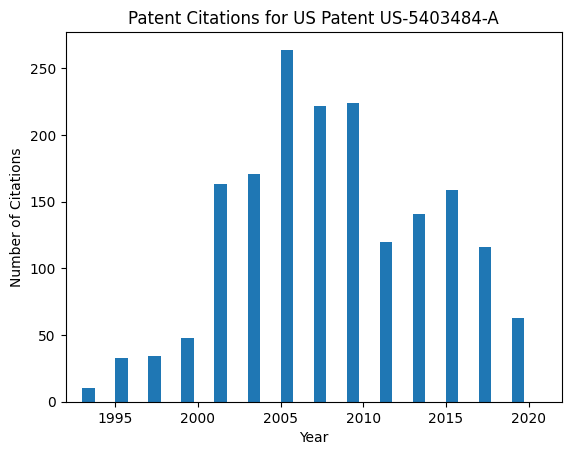

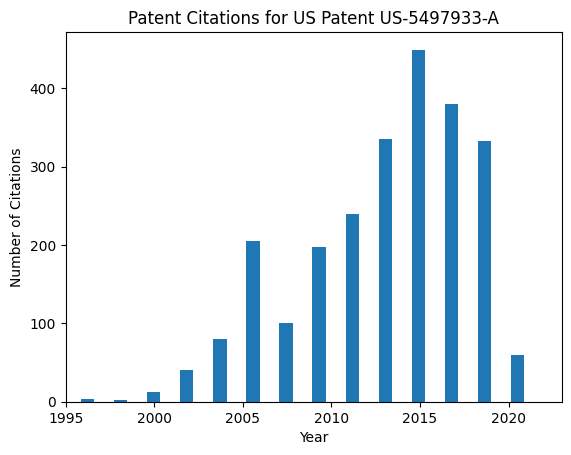

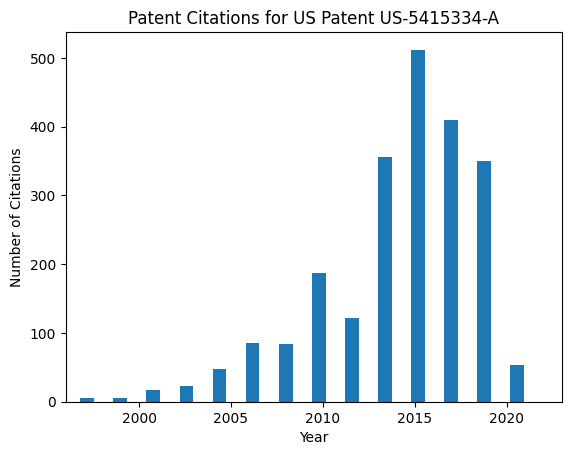

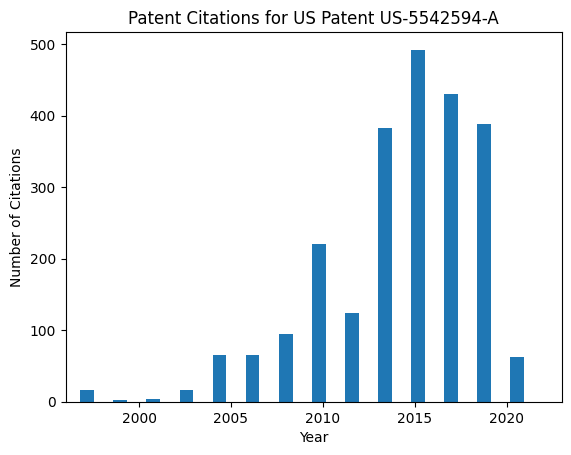

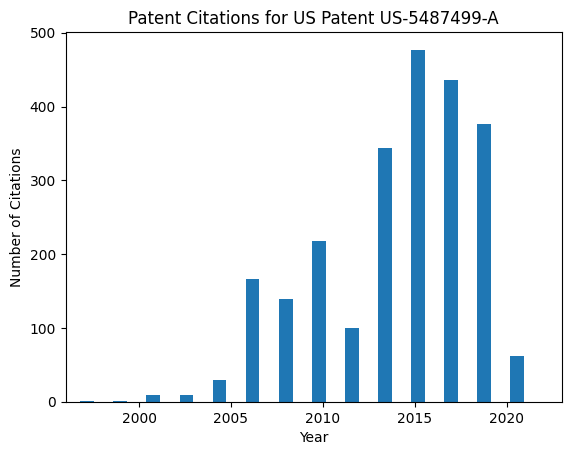

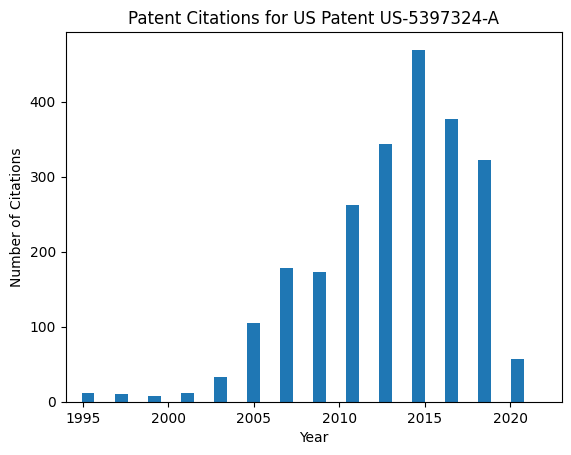

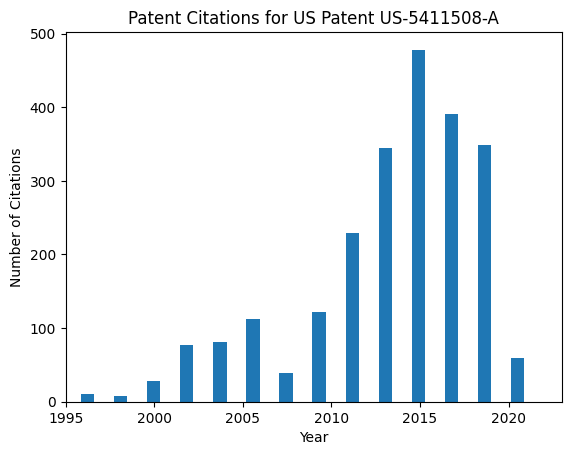

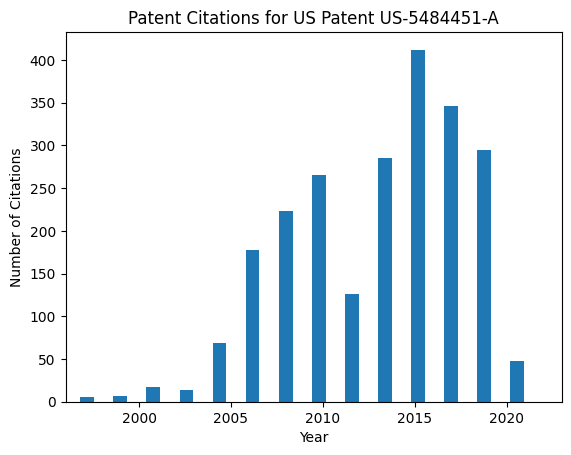

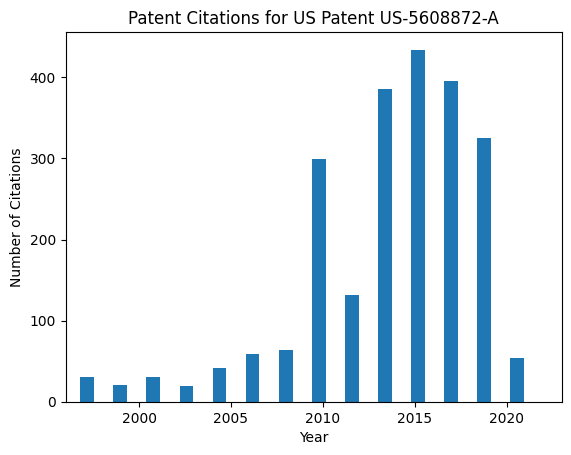

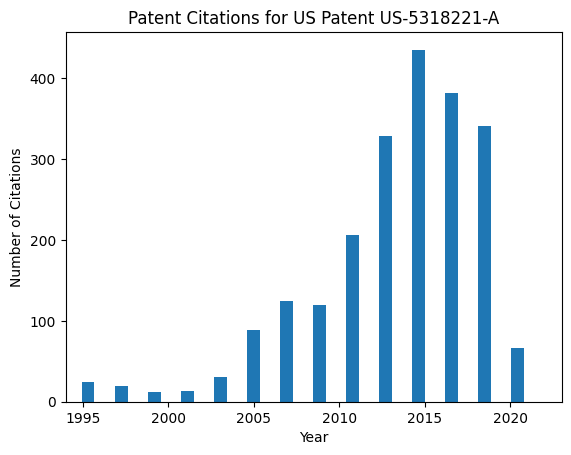

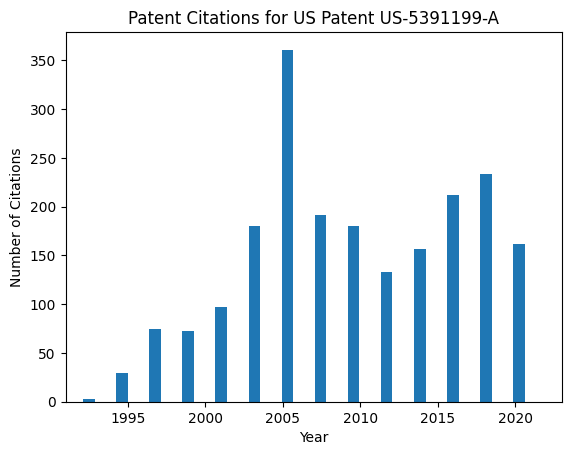

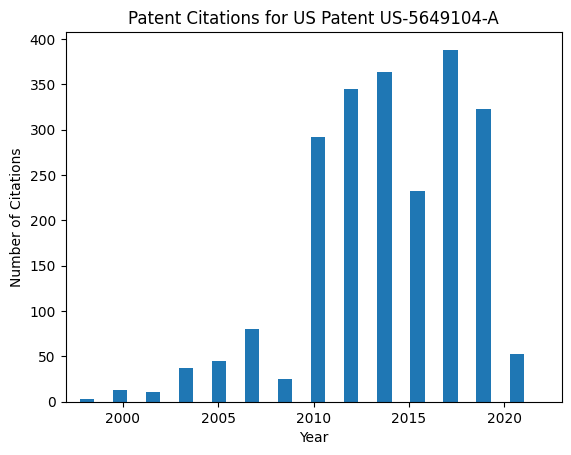

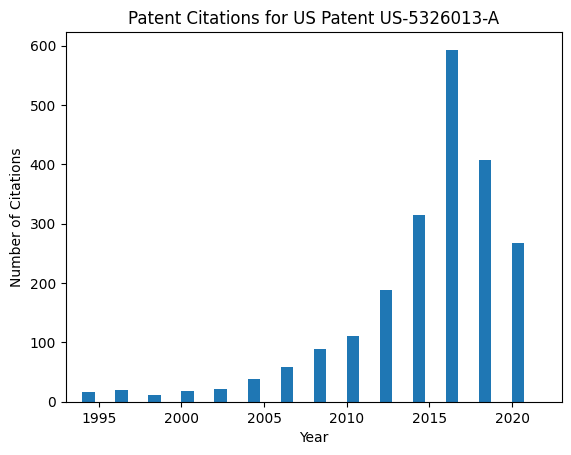

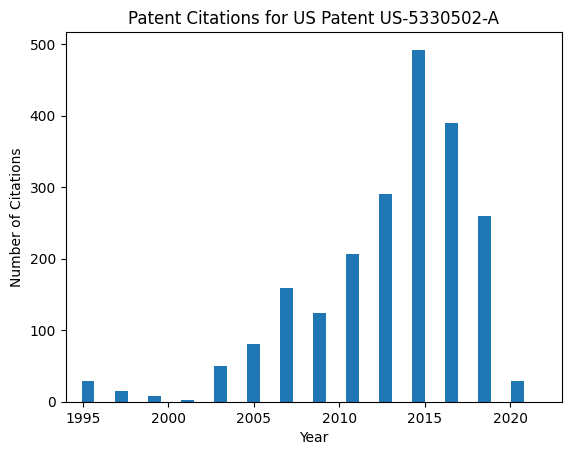

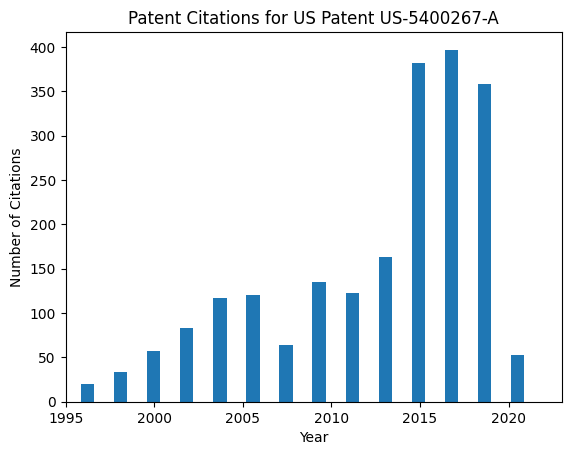

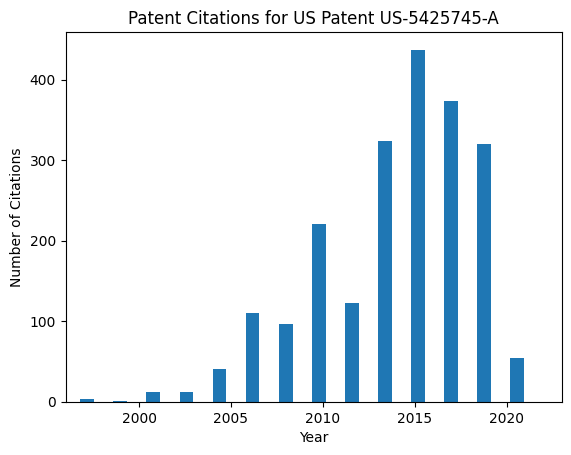

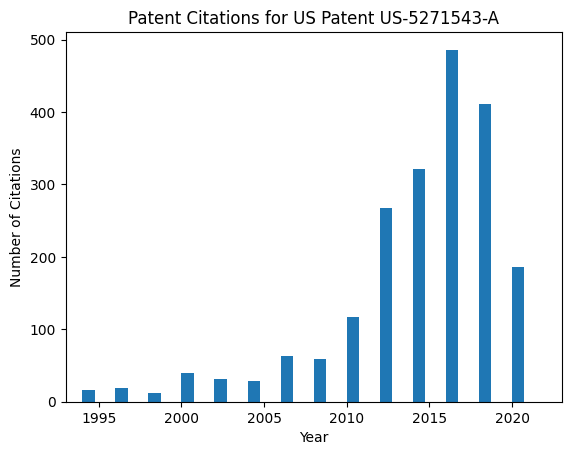

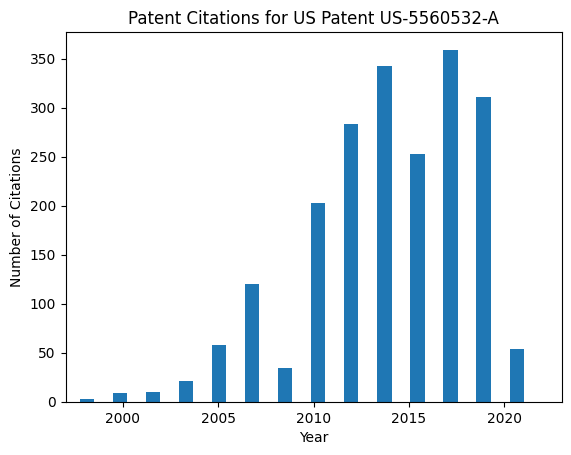

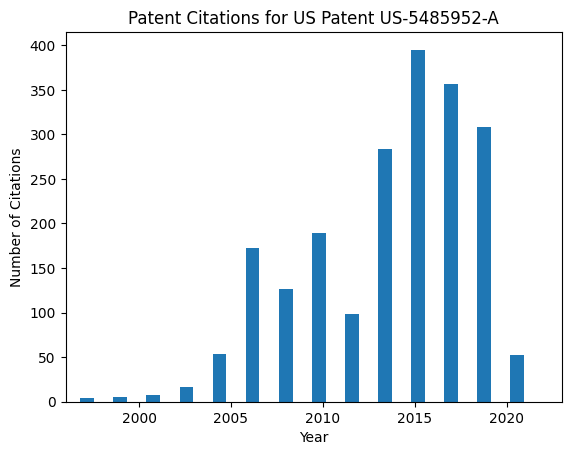

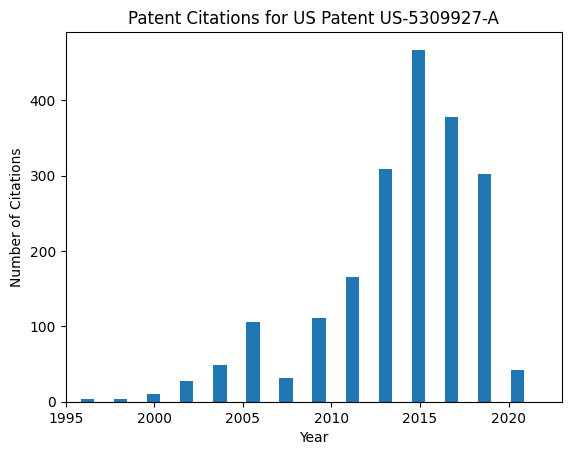

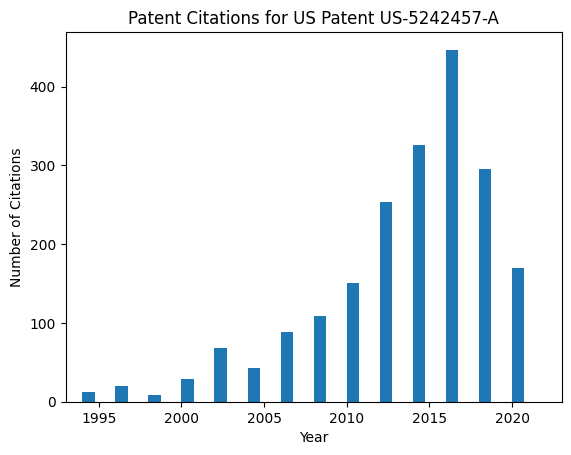

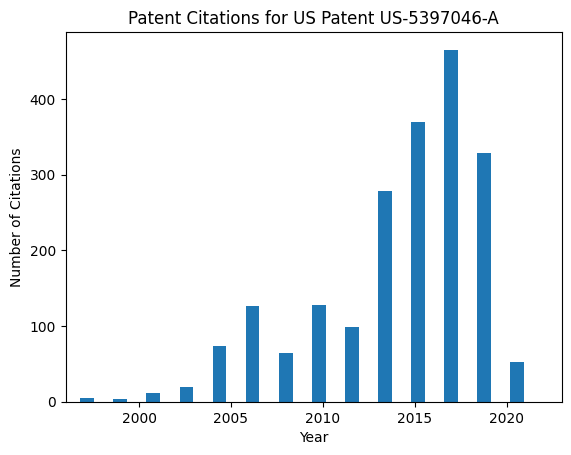

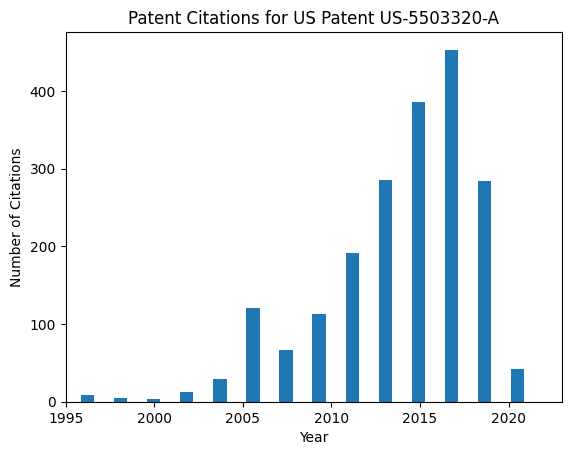

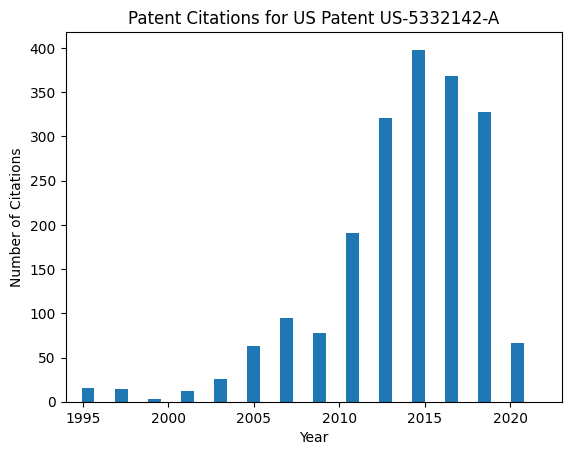

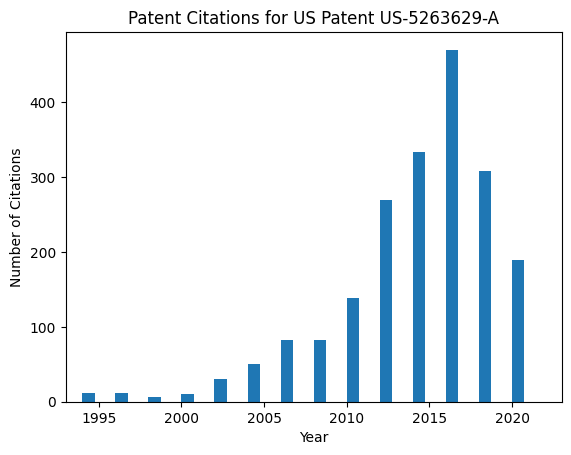

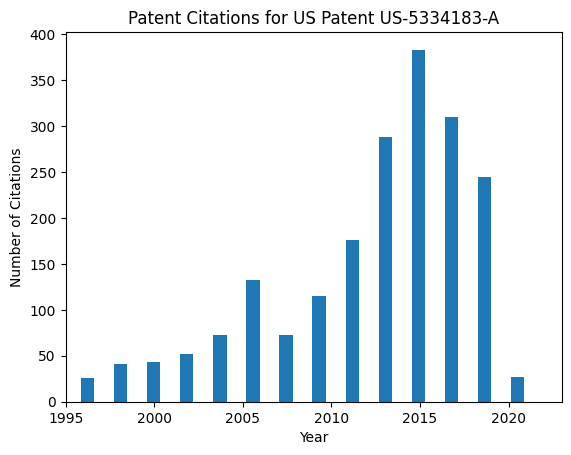

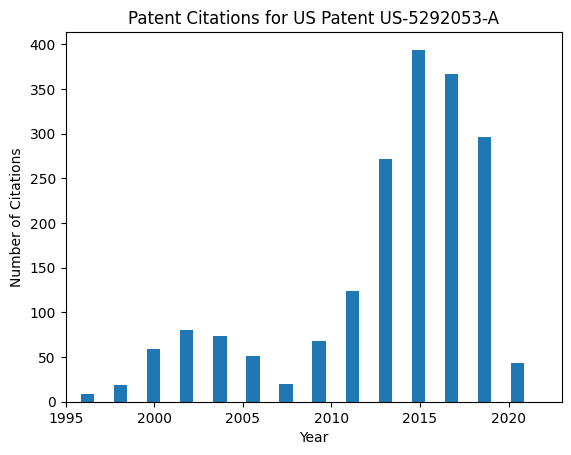

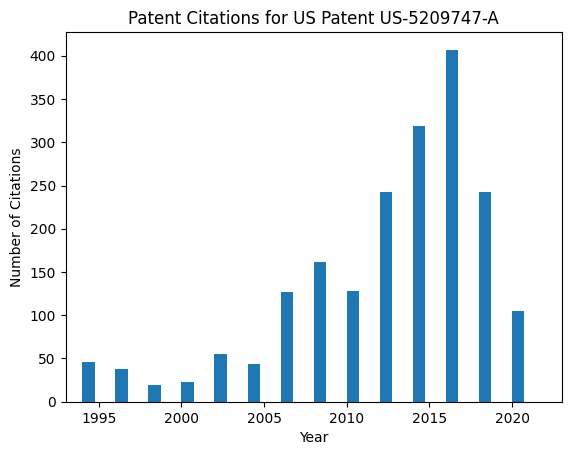

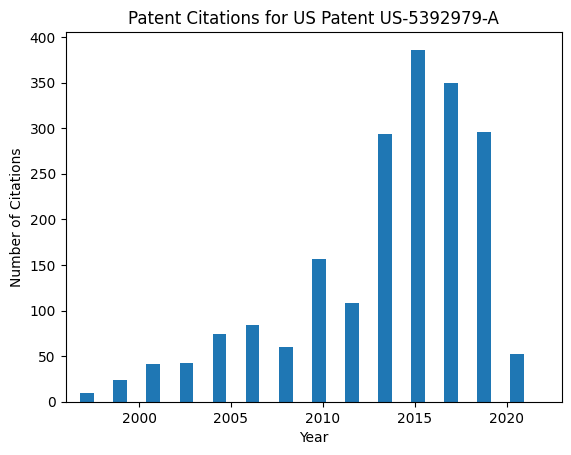

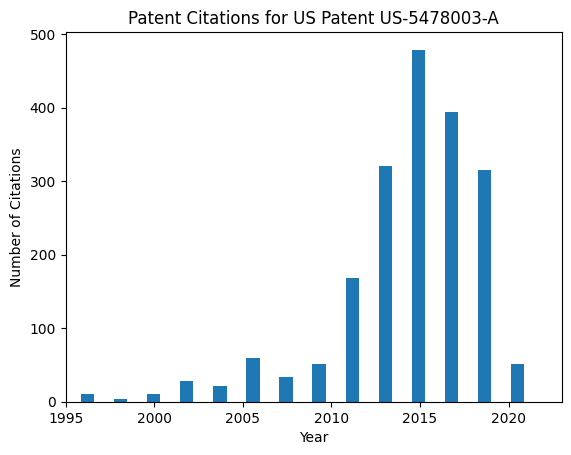

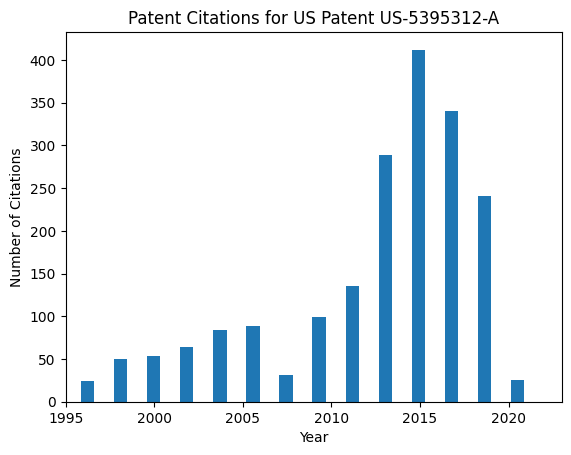

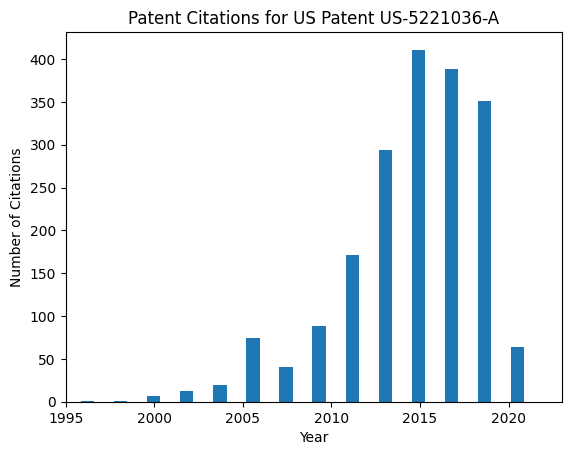

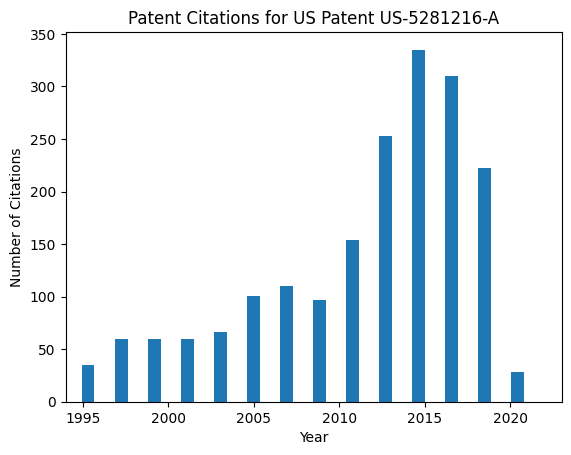

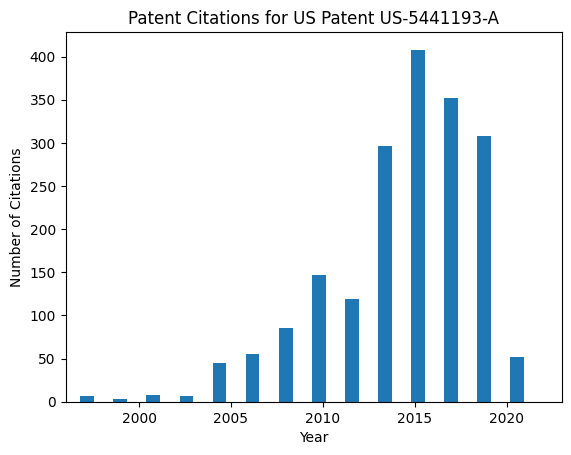

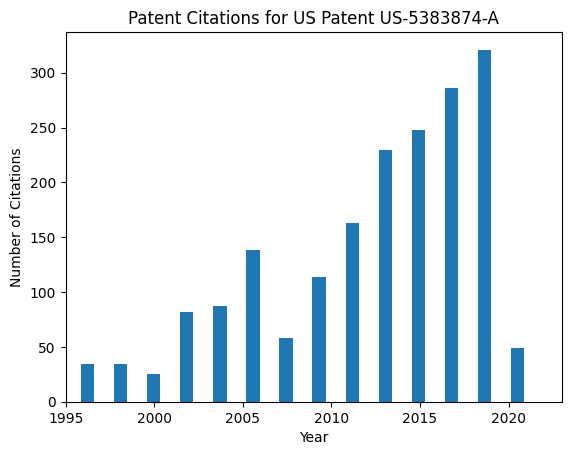

KeyboardInterrupt: 

In [27]:
u_labels = np.unique(label)
fig = plt.figure(figsize = (8,4))
count = 0
#A graphing function of all patents must be done by two year ranges otherwise everything goes boom
#clustering_backup = pd.read_csv("1994-1996/clustering1994-1996.csv")
#df = pd.read_csv("/home/jayden/Code/PatentAnalysis/patent_results1992-1994.csv")
#graph_patents(df, "US-5536637-A")

index = 0
for i in range(1990, 2000, 2):
    print(index)
    index = index + graph_range(i, index, 2, clustering_backup)

"""
for i in label:
    if i == 2:
        pub_code = clustering_backup['Pub'].to_list()[count]
        #print(pub_code)
        #pub_code = temp['Pub'].to_list()[newint]
        #print(pub_code)
        graph_patents(df, pub_code)
        #break
    count +=1

for i in u_labels:
    filtered_label = clustering_unified[label == i]
    print(filtered_label)
    plt.scatter(filtered_label["Time_10"], filtered_label["Time_90"],label = i)
plt.title("Clustered Data comparing CPC classification codes and time taken to reach 1500 citations")
plt.xlabel("Time until 1500 citations (years)")
plt.ylabel("Binarized CPC Classification")
plt.savefig("clustering_1.jpg")
plt.show()
"""